## WORD Embedding
###  is a real-valued vector representation
### of words by embedding both semantic and syntactic meanings
###  obtained from unlabeled large corpus

## Word Embedding VS Feed Forward Network

*the input of feed forward neural network must be one hot encoding to get featured vectors
  one-hot encoding  has two main drawbacks
  
> high-cardinality variables — those with many unique categories — the dimensionality of the transformed vector becomes unmanageable.

> The mapping is completely uninformed: “similar” categories are not placed closer to each other in embedding space.











## Will Feed forward Neural Network learn word Embeding ?
   Yes But .....
  


This is related to using  one-hot encoding in a sense that it maps a discrete category (embedding matrix into a vector feature representation(embedding vectors)
You could still do this for a neural network but if you use this in a dense layer you would create an enormous amount of weights of which most of them are not used regularly (one hot encoding uses many zeros). Putting an embedding layer in between reduces the amount of learnable weights (since is refernces a row and not perform any multiplication ) before feeding them to interact with other parts of your input. 
   


# Architecture
 
 it is a neural network with
 
 * input layer
 * hidden layer
 * output layer
 

In [19]:

dataset=[
    'king man',
    'queen woman',
    'king royal',
    'queen royal',
    'king male',
    'queen  female',
    'king strong',
    'queen weak',
    'lion man',
    'lioness woman',
    'lion animal',
    'lioness animal',
    'lion male',
    'lioness  female',
    'lion strong',
    'lioness weak',
    'king man',
    'queen woman',
    'king royal',
    'queen royal',
    'king male',
    'queen  female',
    'king strong',
    'queen weak',
    'lion man',
    'lioness woman',
    'lion animal',
    'lioness animal',
    'lion male',
    'lioness  female',
    'lion strong',
    'lioness weak',
    'male strong',
    ' female weak',
    'man strong',
    'woman weak',
    'male strong',
    ' female weak',
    'man strong',
    'woman weak',
    'male strong',
    ' female weak',
    'man strong',
    'woman weak',
    'male strong',
    ' female weak',
    'man strong',
    'woman weak',
    'king man',
    'queen woman',
    'king royal',
    'queen royal',
    'king male',
    'queen  female',
    'king strong',
    'queen weak',
    'lion man',
    'lioness woman',
    'lion animal',
    'lioness animal',
    'lion male',
    'lioness  female',
    'lion strong',
    'lioness weak'
]
     

hyperparameters => window size of the context (w) (to understand context of word )

In [20]:
import re
import numpy as np


In [21]:

def clean(string):
    string = string.lower()
    string = re.sub(r'[^\w\s]', '', string) 
    string = ' '.join([word for word in string.split()])
    return string

In [22]:

data=list()
for i in dataset:
    data.append(clean(i))



In [23]:
words=set()

for i in data:
    for w in i.split():
        words.add(w)
print(len(words))
word2index={w:i for i,w in enumerate(words)}
index2word={i:w for i,w in enumerate(words)}
vector=[]
for i in data:
    sent=[]
    for w in i.split():
        sent.append(word2index[w])
    vector.append(sent)
#print(vector)
ds=vector
voc_Size=len(words)
print(len(ds))
    
    

12
64


[dog ,cat,queen ,elephant]
[0     1    2      3     ]

no way elephant is greater than queen so we are onverting the words to embedding

bow,tfidf,ohr do not have a meaning in them

# context is the meaning of the word with respect to the nearby words

Embedding will get the context of the word in form of vectors

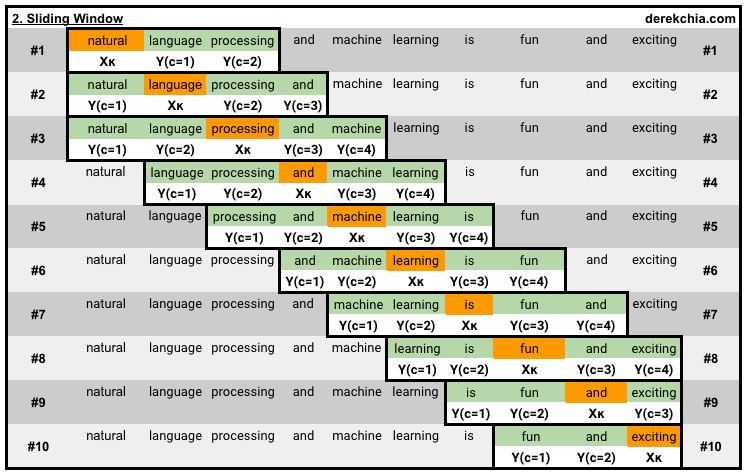


We are going to Build the skip-gram model since it has been shown to produce better word-embeddings than CBOW

In [24]:
class layer:
    def __init__(self):
        self.input=None
        self.output=None
    def forwardpass(inputs,weight):
        raise NotImplementedError
    def backpass(output,errorrate,learnrate):
        raise NotImplementedError
def softmax(x,ax=0):
    e_x = np.exp(x - np.max(x,axis=ax))
    return e_x / e_x.sum(axis=ax)

In [25]:
def tanh(x):   
    return np.tanh(x);

def tanh_prime(x):   
    y= 1-np.tanh(x)**2;
    return y

def sigmoid(x):  
    return 1/(1 + np.exp(-x))

def sigmoid_prime(x):    
    y=sigmoid(x)*(1-sigmoid(x))
    return y

def passs(x):
    return x
def passs_prime(x):
    return 1
class Activation(layer):
    def __init__(self, activation):
        
        if(activation=='tanh'):
            self.activation = tanh
            self.activation_prime = tanh_prime
              
        elif(activation=='sigmoid'):
            self.activation = sigmoid
            self.activation_prime = sigmoid_prime
        else:
            self.activation = passs
            self.activation_prime = passs_prime
            
        
            
    def forward(self, input_data):
        self.activ_input = input_data
        output = self.activation(self.activ_input)
        return output   
    # Eg y=sig(x) //purely math
    #    dy/dx = y*(1-y)if storing output (y)  (or)   sig(x)*(1-sig(x)) if storing input(x)
    #    dL/dx = dL/dy * dy/dx  
    def backward(self, output_error):
        return self.activation_prime(self.activ_input) *  output_error 
                        #  activation_prime(self.input) is dy/dx and output_error is dL/dy * 

In [26]:
class FeedForward(layer):
    def __init__(self,inp_size,out_size):
        self.weights=np.random.rand(inp_size, out_size) - 0.5
        self.bias=np.random.rand(1, out_size) - 0.5
    def update_parameters(self,lr,weight,bias):
        #print(lr,self.weights.shape,weight.shape)
        self.weights-=lr*weight
        self.bias-=lr*bias
    def forward(self,inp_data):
        self.input = inp_data   
        self.output =np.dot(inp_data,self.weights ) 
        #self.output =np.dot(inp_data,self.weights ) + self.bias
        return self.output
    def backward(self, output_error, learning_rate):
       
        input_error = np.dot(output_error, self.weights.T)
       
        weights_error = np.dot(self.input.T, output_error)
      
        self.update_parameters(learning_rate,weights_error,output_error)
       
        return input_error

In [27]:
class Dense(FeedForward,Activation):
    def __init__(self,inp_size,out_size,activ='None'):
        FeedForward.__init__(self,inp_size,out_size)
        Activation.__init__(self,activ)
    def forward_propagation(self,inp_data):
        y  = FeedForward.forward(self,inp_data)
        op = Activation.forward(self,y)
        return op
    def backward_propagation(self, output_error, learning_rate):
        dy=Activation.backward(self,output_error)
        dx=FeedForward.backward(self,dy, learning_rate)
        return dx
        

In [28]:
class Embedding(layer):
    def __init__(self,voc_size,embedding_size):
        self.emb_mat=np.random.uniform(low = 1, high = 10, size = (voc_size, embedding_size))
        self.dim=embedding_size
        self.voc_Sze=voc_size
       
    def forward(self,dense):
        
        self.input = dense          
        sha=list(dense.shape)
        sha.append(self.dim)
        self.output=self.emb_mat[dense.reshape(1,-1)].reshape(sha)     # initiall we are reshaping to get only the words to see the look up table
        # see the correspong embedding vector of words in the lookup table of all batches in all words in a seq (noofseq,seqlen) and returnits coresponding vectors in a shaped format(batcsize,seqlen,embedsize)
        return self.output
        
        
    def backward(self, output_error, lr):
        
        #input_error = np.dot(output_error, self.emb_mat.T) embeding is the initial layer so no need od derivation of input
        o_R=output_error.reshape(-1,self.dim)
             
        k=self.input.reshape(-1) 
        
        o_R = o_R.astype('float64') 
       
        for i,ind in enumerate(k.T):
            self.emb_mat[ind]-=(o_R[i]*lr)  
        
        return 1
    

In [29]:
def SparseCategoricalCrossentropy(pred,y):
    error =pred.copy()   
    for i,_ in enumerate(pred):        
        error[i,y[i]]-=1
    return error  
def Mse(err):
    
    return np.sum(err**2)/err.size
  

If the output is a one-hot encoded vector, then use categorical_crossentropy. 
Use SparseCategoricalCrossentropy loss for word2index vector containing integers.
   
   sorry for the many reshapes bcz we are combining embedding layer with dense layer 

In [30]:
# predict context of words from given word
class skip_gram():
    
    def __init__(self,embedding_unit,voc_Size):
        self.embedding_layer=Embedding(voc_Size,embedding_unit)
        self.dense=Dense(embedding_unit,voc_Size)
        
        self.emb_dim=embedding_unit
    # context depends on surrounding words
    
    def get_context(self,word,seq,window):
        l=len(seq)   
        start=max(0,word-window)
        end=min(l,word+window+1)
        
        seq_context=[]
        for j in (seq[start:end]):
            if(j!=seq[word]):
                seq_context.append(j)
           
            
        return [seq[word],seq_context]
    def get_dataset(self,corpus,window):
        skpigramds=[]
        for sent in corpus:
            for w_i,w in enumerate(sent):
                con=self.get_context(w_i,sent,window)     
                skpigramds.append(con)
                
            
        return skpigramds        
    def fit(self,corpus,window,epochs,lr):
        dataset=self.get_dataset(corpus,window)
        self.window=window
        self.batch_size=1
        dr=epochs/25
        # lets take batch size as 1 and subsequently seq length as a single word for easy computation but..  the above classes are framed according to input and ouput shape of keras documenttion documentation
        for epc in range(epochs+1):
            loss=[]
            for nom,[w,context] in enumerate(dataset):
                
                i_p=np.array(([w])).reshape(self.batch_size)
                l1=self.embedding_layer.forward(i_p)
               
                l2=self.dense.forward(l1)
                
                # the shape of layer 2 is (batch size,dense units(vocabulary size in w2v))
                # softmax should be applied  across the hidden unit and not across the batches
                
                pred=softmax(l2,1)
                p=np.array((context)).reshape(self.batch_size,-1)
                
                # calculate loss  and error         
                error=SparseCategoricalCrossentropy(pred,p)   
                loss.append( Mse(error))
                
                dl1=self.dense.backward(error,lr)
                              
                x=self.embedding_layer.backward(dl1,lr)
                
            if(epc%10==0):
                print('epoch : ',epc,'\t','loss: ',sum(loss)/len(loss))
    def predict(self,corpus,i2d,top=3):
        dataset=self.get_dataset(corpus,self.window)
        for [w,context] in dataset:
                
                i_p=np.array(([w])).reshape(self.batch_size)
                
                l1=self.embedding_layer.forward(i_p)
                l2=self.dense.forward(l1)
                pred=softmax(l2,1)
                
                p=pred.reshape(-1)
                mp=np.flipud(np.sort(p))
                ct=[]
                for i in range(top):
                    
                    ct.append(i2d[np.where(p==mp[i])[0][0]])
                print(i2d[w],ct,[i2d[i] for i in context])
       
                
                
                
                
                
        

In [31]:
l=voc_Size
sg = skip_gram(8,l)
print(l)
sg.fit(ds,3,2000,0.0001)





12
epoch :  0 	 loss:  0.11104491398536738
epoch :  10 	 loss:  0.08756555289533645
epoch :  20 	 loss:  0.08168753195012621
epoch :  30 	 loss:  0.07943460352419138
epoch :  40 	 loss:  0.07802609191060367
epoch :  50 	 loss:  0.07672416797646729
epoch :  60 	 loss:  0.07541500838974628
epoch :  70 	 loss:  0.07410312545403679
epoch :  80 	 loss:  0.07301848527916548
epoch :  90 	 loss:  0.07218226264854985
epoch :  100 	 loss:  0.07150032849257765
epoch :  110 	 loss:  0.07092467740645568
epoch :  120 	 loss:  0.07043189835001694
epoch :  130 	 loss:  0.07000640670109681
epoch :  140 	 loss:  0.06963597095385735
epoch :  150 	 loss:  0.06931061081191464
epoch :  160 	 loss:  0.06902219722234537
epoch :  170 	 loss:  0.06876416636099893
epoch :  180 	 loss:  0.06853125392417292
epoch :  190 	 loss:  0.06831925175778107
epoch :  200 	 loss:  0.06812479659638382
epoch :  210 	 loss:  0.06794519433300787
epoch :  220 	 loss:  0.06777827797809954
epoch :  230 	 loss:  0.0676222949260137
e

epoch :  1940 	 loss:  0.06027786157587975
epoch :  1950 	 loss:  0.06025987842072113
epoch :  1960 	 loss:  0.060242084631814324
epoch :  1970 	 loss:  0.06022447892801828
epoch :  1980 	 loss:  0.06020706001453255
epoch :  1990 	 loss:  0.060189826583606935
epoch :  2000 	 loss:  0.06017277731524288


In [16]:
#predict='king queen man'
sg.predict(ds,index2word,top=4)

king ['strong', 'male', 'royal', 'man'] ['man']
man ['strong', 'lion', 'king', 'weak'] ['king']
queen ['weak', 'royal', 'woman', 'female'] ['woman']
woman ['weak', 'lioness', 'queen', 'king'] ['queen']
king ['strong', 'male', 'royal', 'man'] ['royal']
royal ['queen', 'king', 'female', 'lion'] ['king']
queen ['weak', 'royal', 'woman', 'female'] ['royal']
royal ['queen', 'king', 'female', 'lion'] ['queen']
king ['strong', 'male', 'royal', 'man'] ['male']
male ['strong', 'lion', 'king', 'royal'] ['king']
queen ['weak', 'royal', 'woman', 'female'] ['female']
female ['weak', 'lioness', 'queen', 'king'] ['queen']
king ['strong', 'male', 'royal', 'man'] ['strong']
strong ['man', 'male', 'lion', 'king'] ['king']
queen ['weak', 'royal', 'woman', 'female'] ['weak']
weak ['woman', 'female', 'lioness', 'queen'] ['queen']
lion ['strong', 'male', 'man', 'animal'] ['man']
man ['strong', 'lion', 'king', 'weak'] ['lion']
lioness ['weak', 'woman', 'animal', 'female'] ['woman']
woman ['weak', 'lioness', 